In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns


In [2]:
def undirected(n, p = .5):
    matrix = np.random.rand(n, n) < p
    symmetric = np.triu(matrix, k = 1).T + np.triu(matrix, k = 1)
    return symmetric

def directed(n, p = .5):
    matrix = np.random.rand(n, n) < p
    np.fill_diagonal(matrix, 0)
    return matrix

In [3]:
# check degree distribution for undirected and it's mean value
means = list()
for _ in tqdm(range(50)):
    dist = undirected(5000, p = .2).sum(axis = 0)
    means.append(dist.mean())
print(np.mean(means))

means = list()
for _ in tqdm(range(50)):
    dist = undirected(5000, p = .5).sum(axis = 0)
    means.append(dist.mean())
print(np.mean(means))

means = list()
for _ in tqdm(range(50)):
    dist = undirected(5000, p = .8).sum(axis = 0)
    means.append(dist.mean())
print(np.mean(means))

100%|██████████| 50/50 [00:51<00:00,  1.04s/it]


999.724264


100%|██████████| 50/50 [00:51<00:00,  1.03s/it]


2499.457152


100%|██████████| 50/50 [00:53<00:00,  1.07s/it]

3999.114912


100%|██████████| 9/9 [00:03<00:00,  2.45it/s]


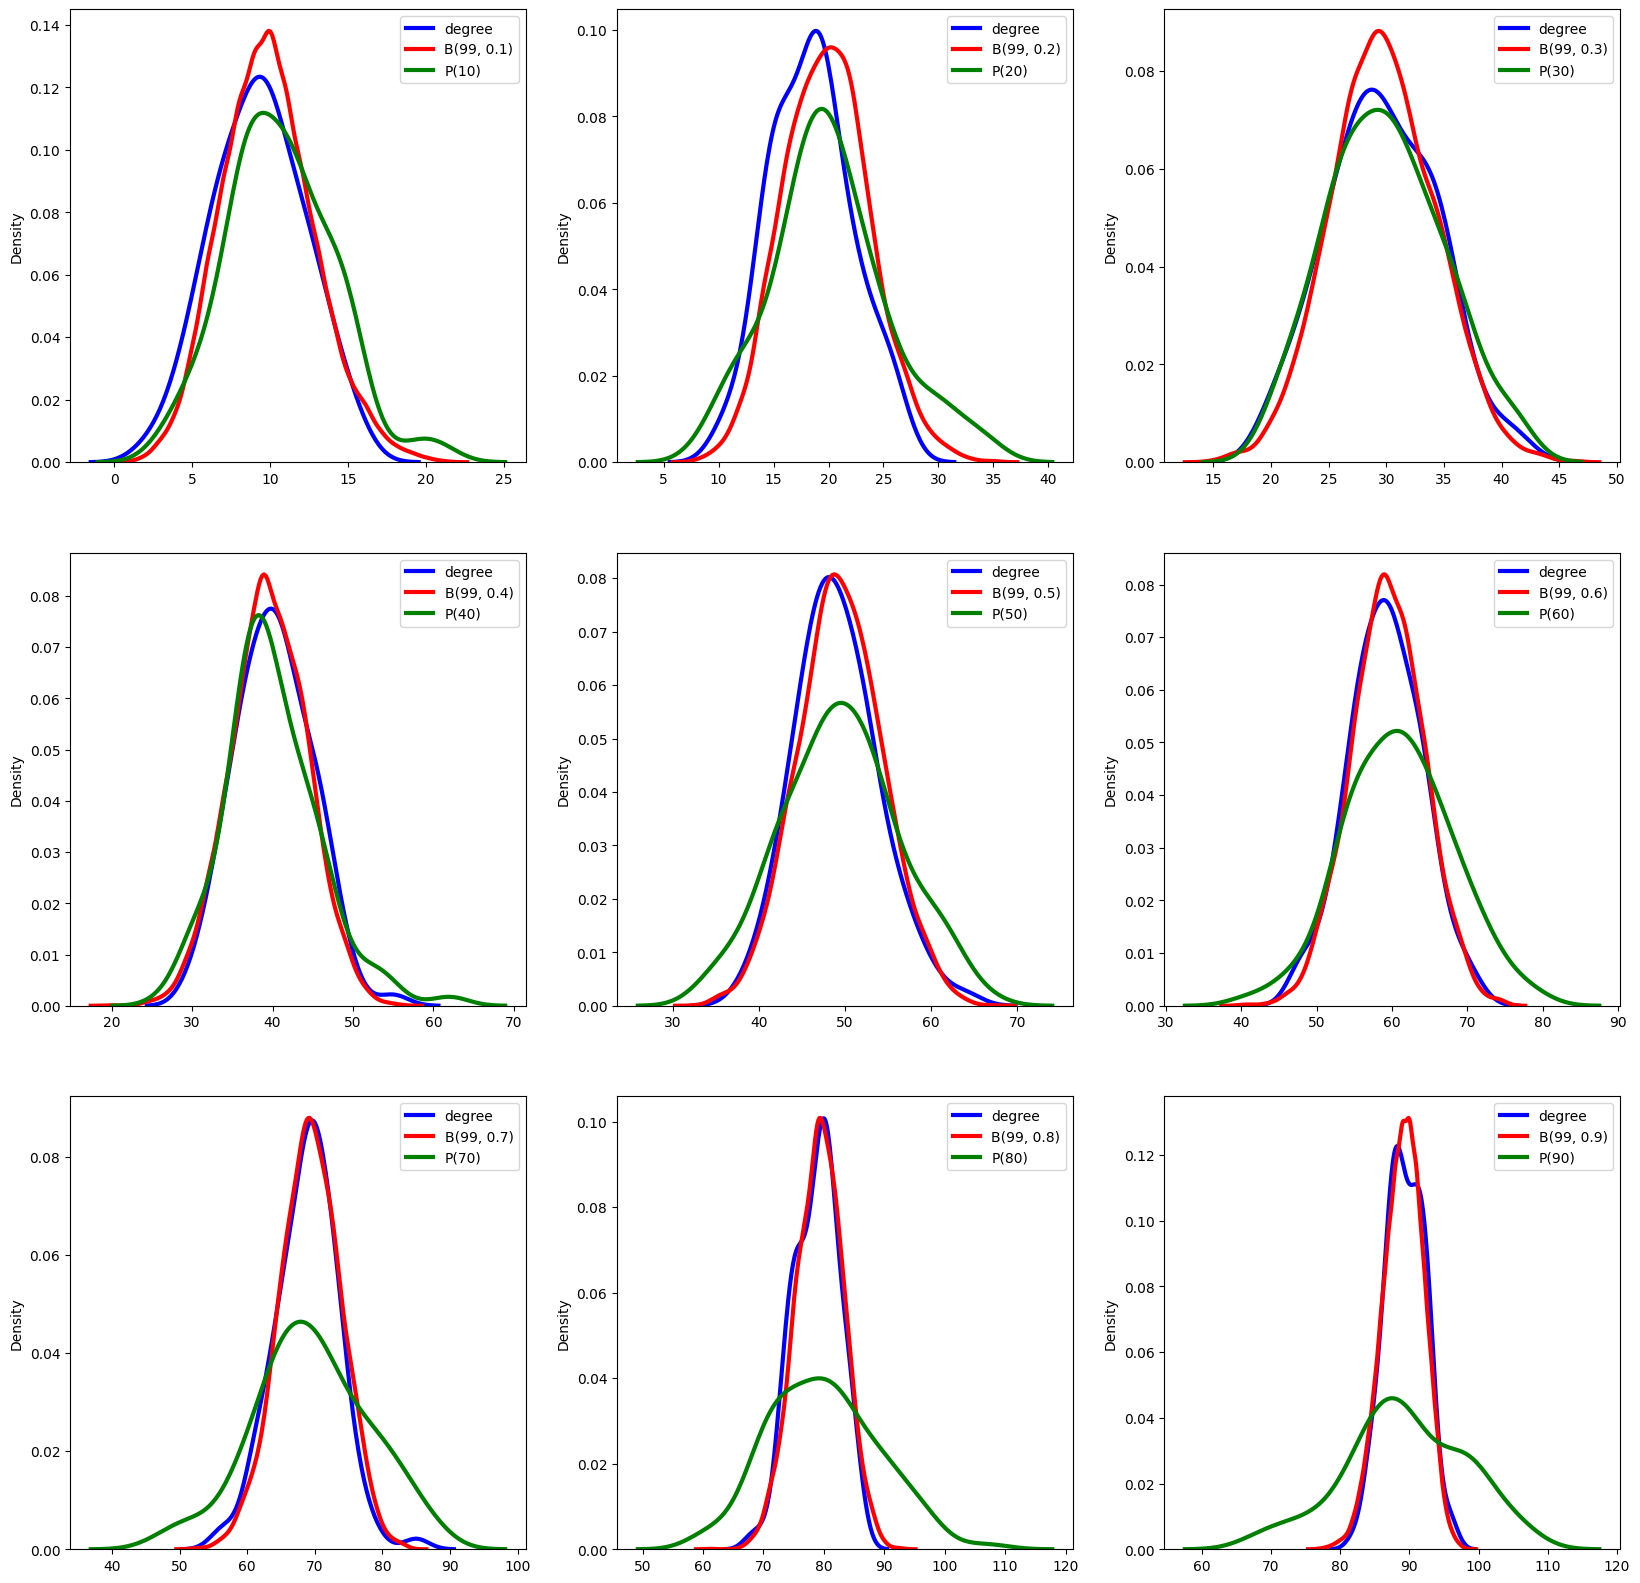

In [9]:
FIG = plt.figure(figsize = (20,20))
for idx, i in tqdm(enumerate(range(1, 10, 1)), total = 9):
    plt.subplot(3, 3, idx + 1)
    n = 100
    p = i/10
    lam = n*p
    _ = sns.kdeplot(undirected(n, p).sum(axis = 1), color = 'blue', linewidth = 3, label = 'degree')
    _ = sns.kdeplot(np.random.binomial(n - 1, p, size = 5000), color = 'red', linewidth = 3, label = f'B({n - 1}, {p})')
    _ = sns.kdeplot(np.random.poisson(lam, n), color = 'green', linewidth = 3, label = f'P({int(lam)})')
    _ = plt.legend()
FIG.savefig('1.png')

100%|██████████| 9/9 [00:45<00:00,  5.02s/it]


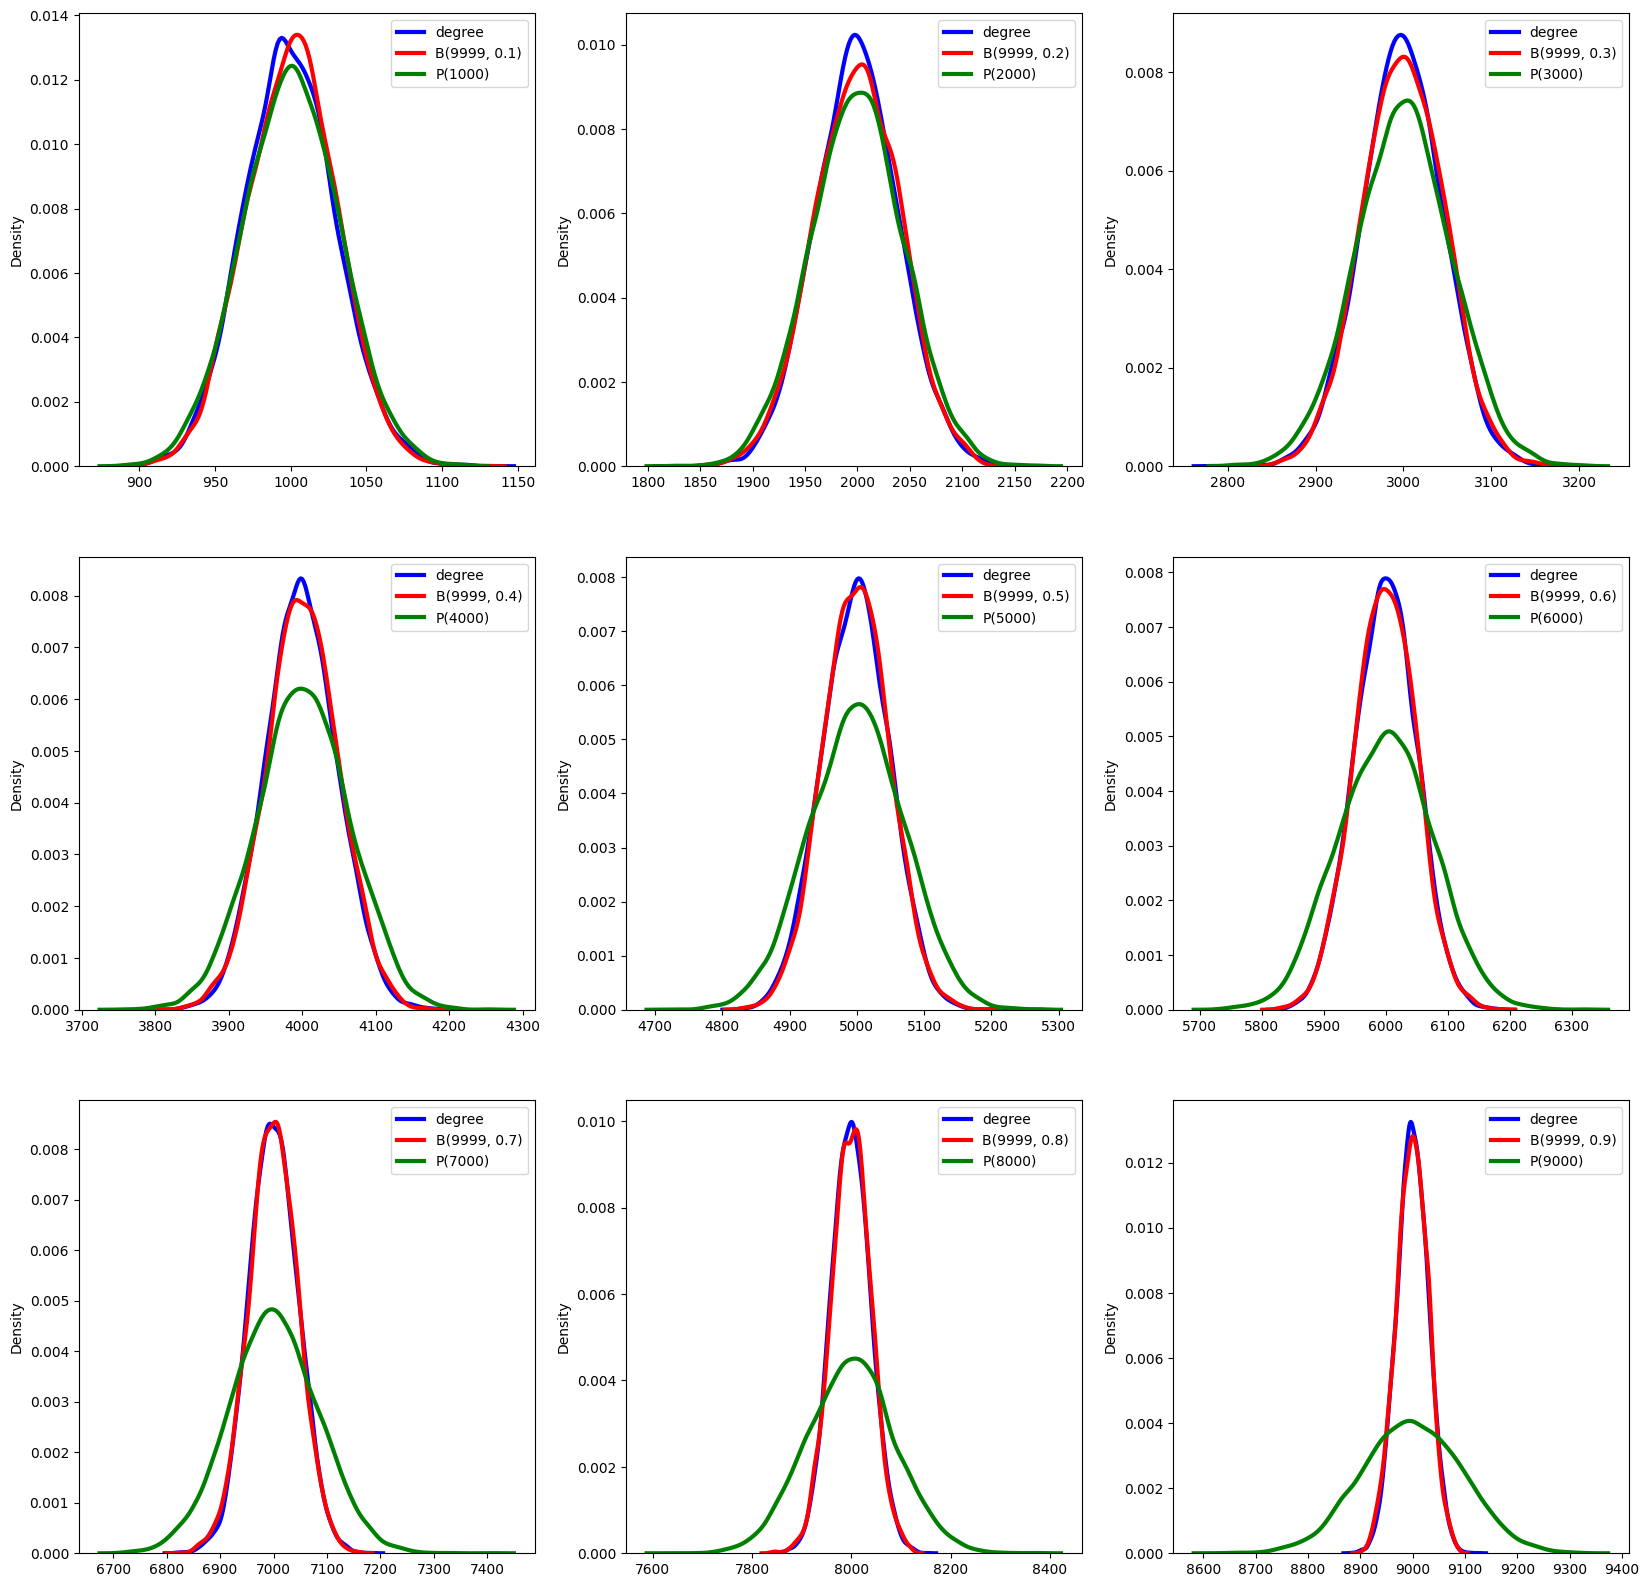

In [10]:
FIG = plt.figure(figsize = (20,20))
for idx, i in tqdm(enumerate(range(1, 10, 1)), total = 9):
    plt.subplot(3, 3, idx + 1)
    n = 10000
    p = i/10
    lam = n*p
    _ = sns.kdeplot(undirected(n, p).sum(axis = 1), color = 'blue', linewidth = 3, label = 'degree')
    _ = sns.kdeplot(np.random.binomial(n - 1, p, size = 5000), color = 'red', linewidth = 3, label = f'B({n - 1}, {p})')
    _ = sns.kdeplot(np.random.poisson(lam, n), color = 'green', linewidth = 3, label = f'P({int(lam)})')
    _ = plt.legend()
FIG.savefig('2.png')

100%|██████████| 9/9 [00:03<00:00,  2.99it/s]


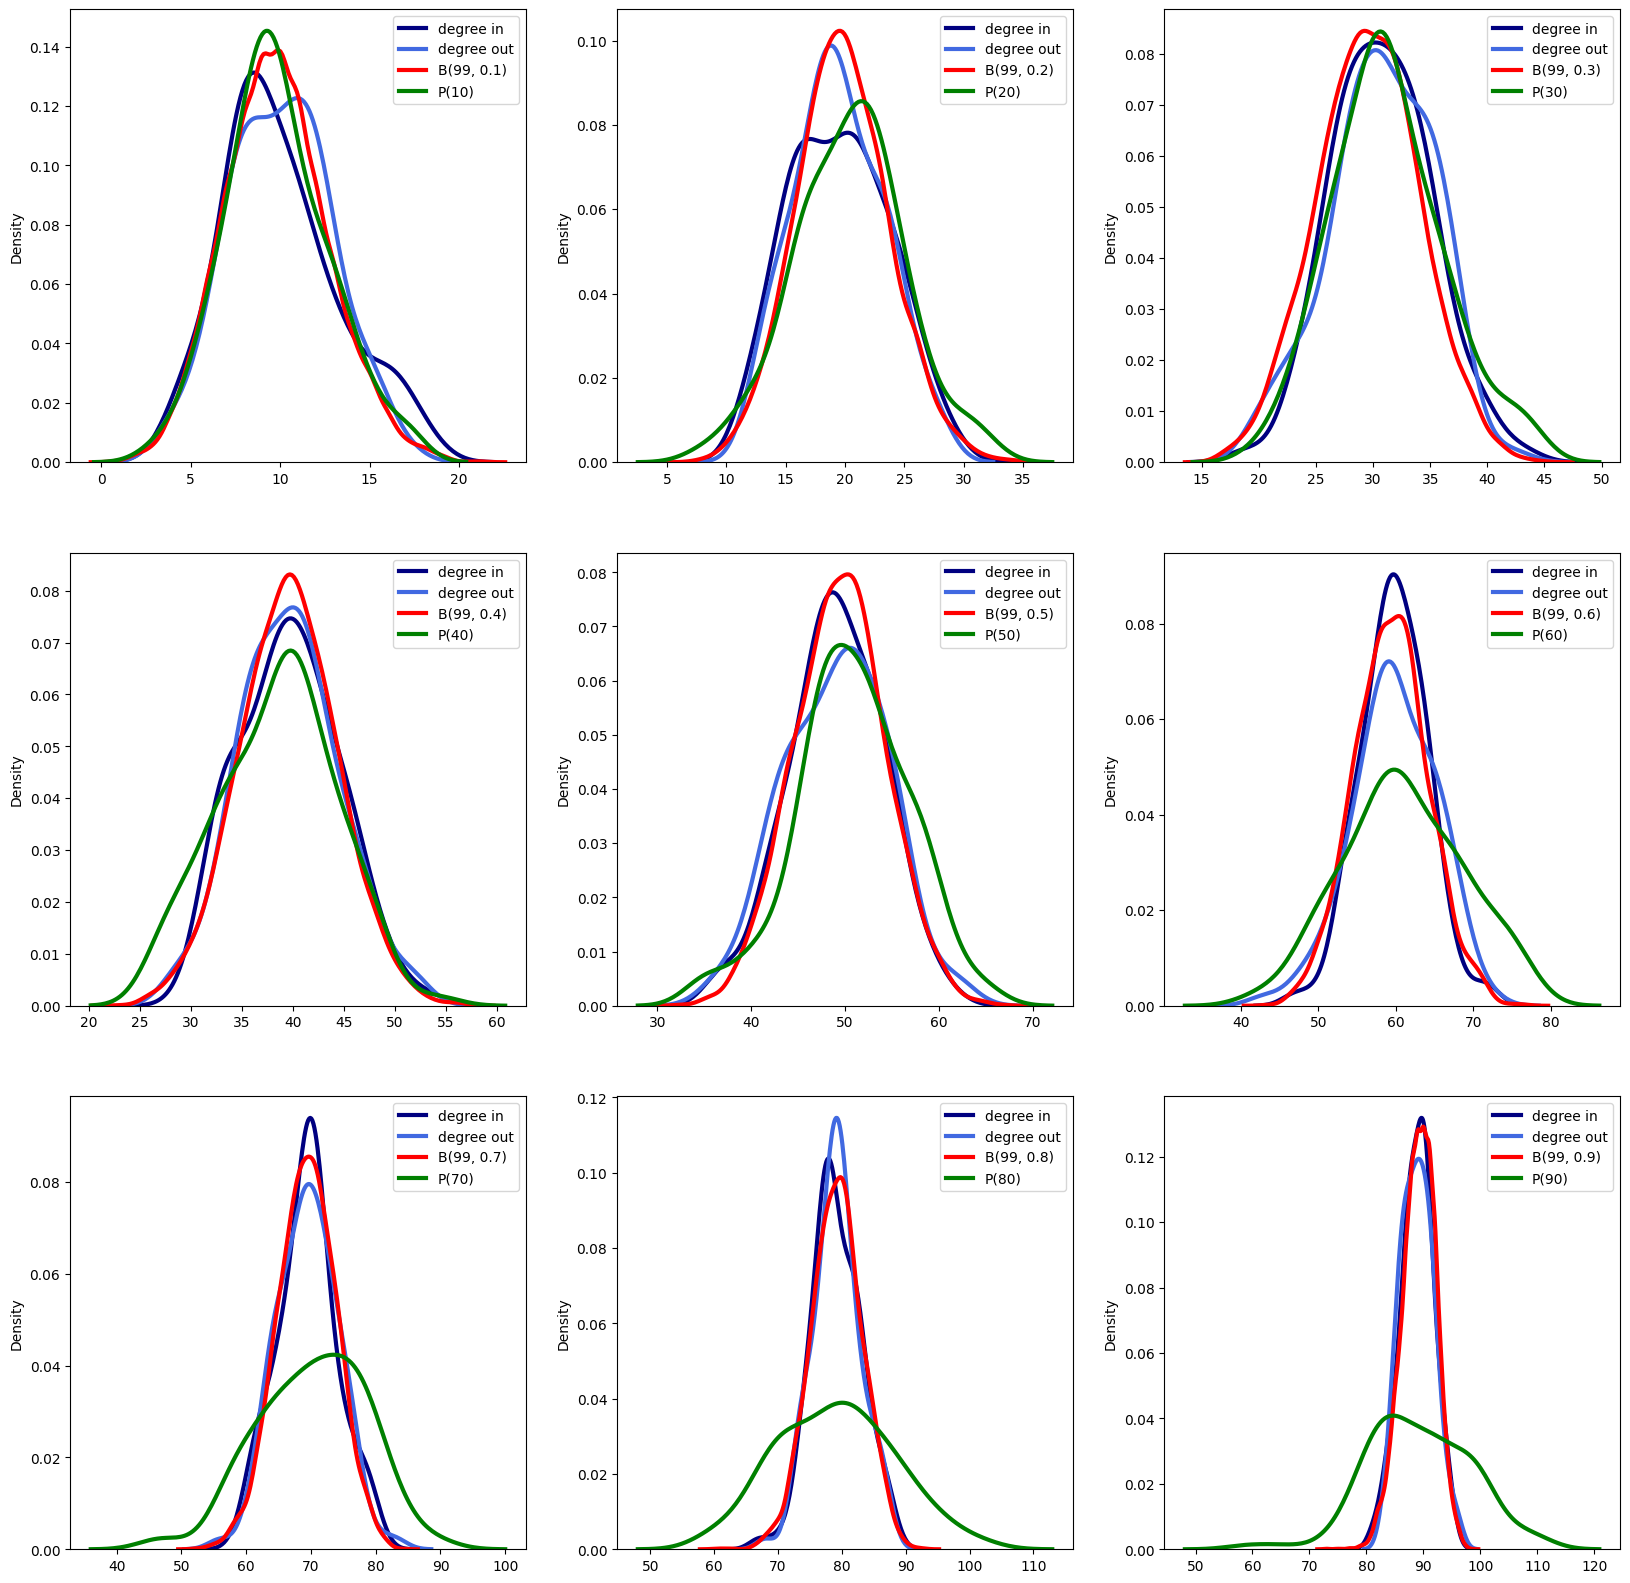

In [11]:
FIG = plt.figure(figsize = (20,20))
for idx, i in tqdm(enumerate(range(1, 10, 1)), total = 9):
    plt.subplot(3, 3, idx + 1)
    n = 100
    p = i/10
    lam = n*p
    mat = directed(n, p)
    _ = sns.kdeplot(mat.sum(axis = 0), color = 'navy', linewidth = 3, label = 'degree in')
    _ = sns.kdeplot(mat.sum(axis = 1), color = 'royalblue', linewidth = 3, label = 'degree out')
    _ = sns.kdeplot(np.random.binomial(n - 1, p, size = 5000), color = 'red', linewidth = 3, label = f'B({n - 1}, {p})')
    _ = sns.kdeplot(np.random.poisson(lam, n), color = 'green', linewidth = 3, label = f'P({int(lam)})')
    _ = plt.legend()
FIG.savefig('3.png')

100%|██████████| 9/9 [00:35<00:00,  3.99s/it]


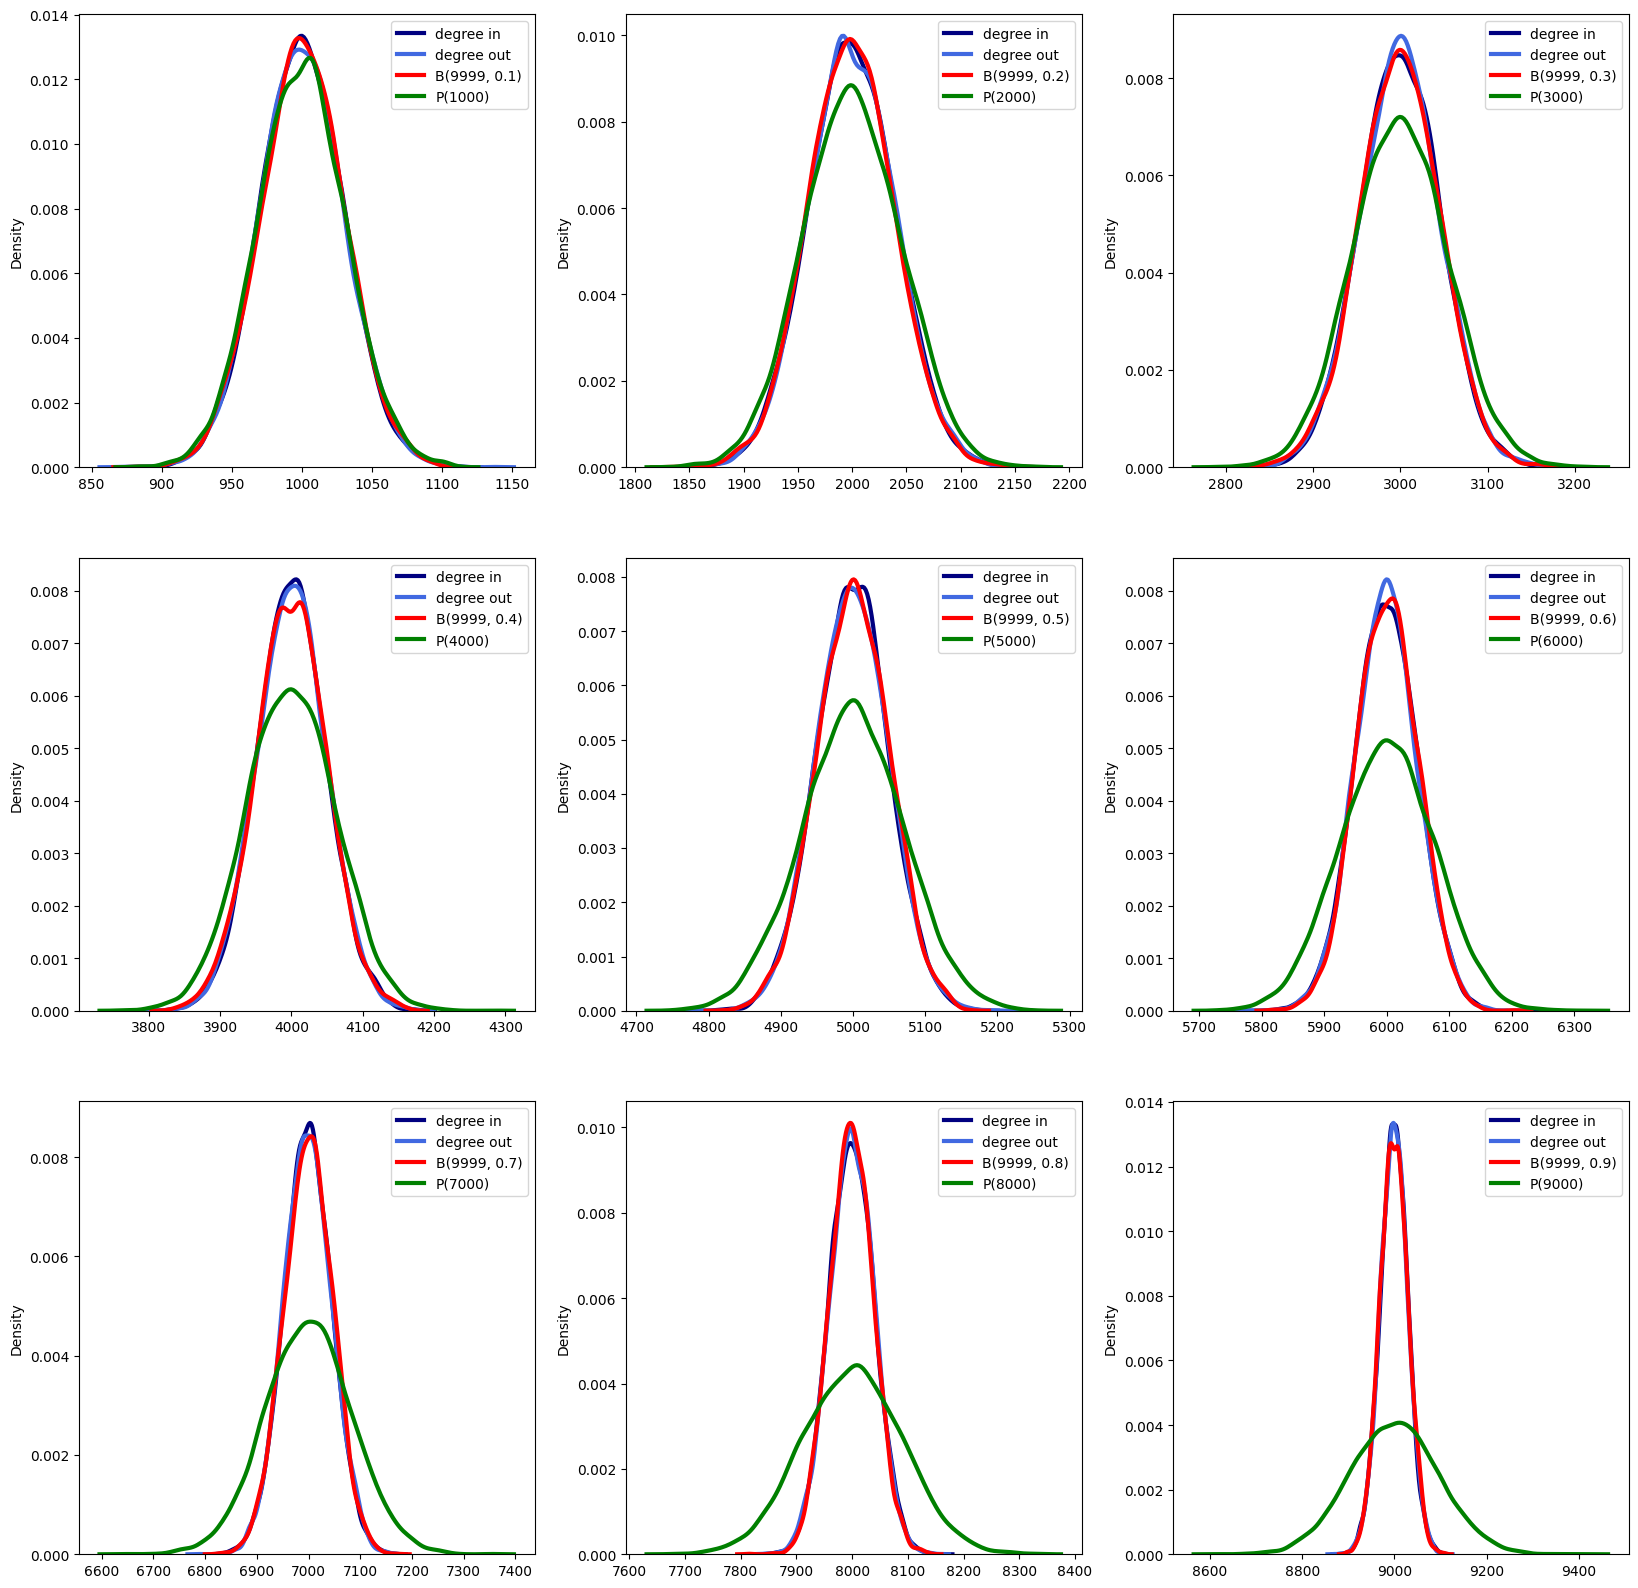

In [12]:
FIG = plt.figure(figsize = (20,20))
for idx, i in tqdm(enumerate(range(1, 10, 1)), total = 9):
    plt.subplot(3, 3, idx + 1)
    n = 10000
    p = i/10
    lam = n*p
    mat = directed(n, p)
    _ = sns.kdeplot(mat.sum(axis = 0), color = 'navy', linewidth = 3, label = 'degree in')
    _ = sns.kdeplot(mat.sum(axis = 1), color = 'royalblue', linewidth = 3, label = 'degree out')
    _ = sns.kdeplot(np.random.binomial(n - 1, p, size = 5000), color = 'red', linewidth = 3, label = f'B({n - 1}, {p})')
    _ = sns.kdeplot(np.random.poisson(lam, n), color = 'green', linewidth = 3, label = f'P({int(lam)})')
    _ = plt.legend()
FIG.savefig('4.png')